In [74]:
'''Scenario 7: City Air Quality Index (AQI)
Environmental data analysis task.
Tasks:
Create AQI values for 5 cities over 30 days.


Categorize AQI (Good, Moderate, Poor).


Count number of poor AQI days per city.

Plot:

Line plots for AQI trends

Bar chart of poor AQI days'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cities = ['delhii', 'mumbai', 'pune', 'bangalore', 'nashik']
dates = pd.date_range(start='2024-01-01', periods=30)

data = []

for city in cities:
    for date in dates:
        aqi = np.random.randint(50, 300)
        data.append([date, city, aqi])

df = pd.DataFrame(data, columns=['date', 'city', 'aqi'])
df

,date,city,aqi
0,2024-01-01,delhii,294
1,2024-01-02,delhii,108
2,2024-01-03,delhii,193
3,2024-01-04,delhii,198
4,2024-01-05,delhii,162
...,...,...,...
145,2024-01-26,nashik,296
146,2024-01-27,nashik,226
147,2024-01-28,nashik,66
148,2024-01-29,nashik,130


In [75]:
def categorize_aqi(aqi):
    if aqi <= 100:
        return 'Good'
    elif aqi <= 200:
        return 'Moderate'
    else:
        return 'Poor'

df['aqi_category'] = df['aqi'].apply(categorize_aqi)


In [76]:
poor_aqi_count = (
    df[df['aqi_category'] == 'Poor']
    .groupby('city')
    .size()
    .reset_index(name='poor_aqi_days')
)

print(poor_aqi_count)

        city  poor_aqi_days
0  bangalore              9
1     delhii             10
2     mumbai             13
3     nashik             10
4       pune             11


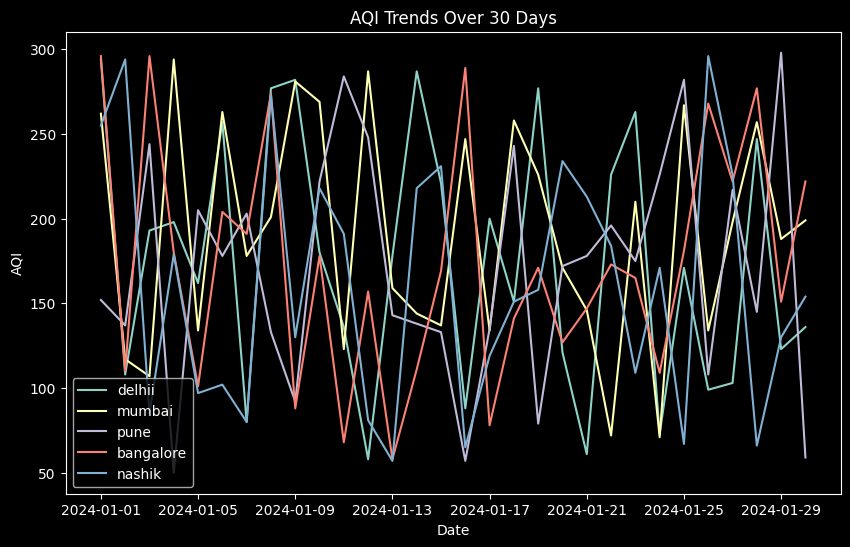

In [78]:
plt.figure(figsize=(10, 6))

for city in cities:
    city_data = df[df['city'] == city]
    plt.plot(city_data['date'], city_data['aqi'], label=city)

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Trends Over 30 Days')
plt.legend()
plt.show()

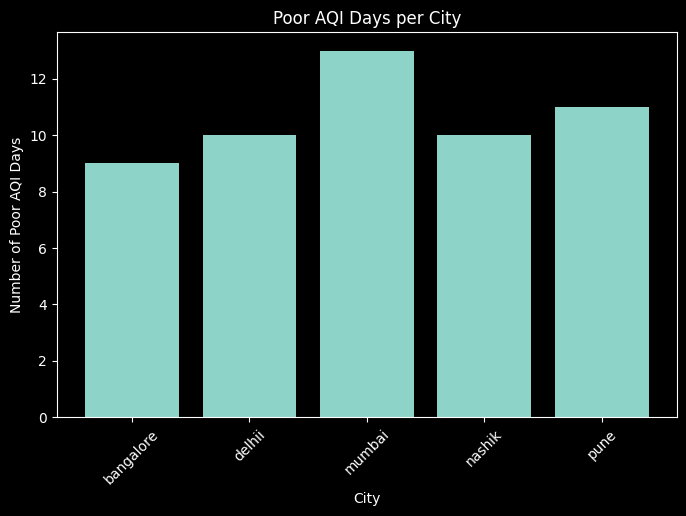

In [79]:
plt.figure(figsize=(8, 5))
plt.bar(poor_aqi_count['city'], poor_aqi_count['poor_aqi_days'])

plt.xlabel('City')
plt.ylabel('Number of Poor AQI Days')
plt.title('Poor AQI Days per City')
plt.xticks(rotation=45)
plt.show()
